In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv('GOOG.csv', date_parser=True)

/tmp/ipykernel_21129/4004871585.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('GOOG.csv', date_parser=True)


In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Close']]

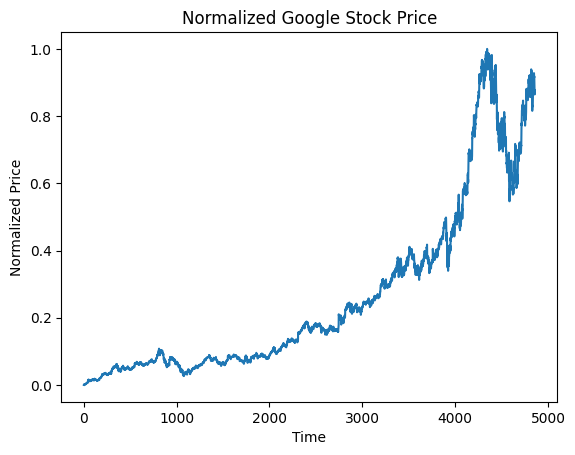

In [52]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

plt.plot(scaled_data)
plt.title("Normalized Google Stock Price")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.show()

In [73]:
def create_sequences(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [74]:
time_step = 60  

X, y = create_sequences(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [75]:

model = Sequential()

model.add(SimpleRNN(units=40, return_sequences=False, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0025 - val_loss: 0.0089
Epoch 2/10
120/120 [==============================] - 0s 4ms/step - loss: 5.5859e-05 - val_loss: 0.0109
Epoch 3/10
120/120 [==============================] - 0s 3ms/step - loss: 5.5452e-05 - val_loss: 0.0111
Epoch 4/10
120/120 [==============================] - 1s 4ms/step - loss: 4.0548e-05 - val_loss: 0.0114
Epoch 5/10
120/120 [==============================] - 0s 3ms/step - loss: 3.8534e-05 - val_loss: 0.0150
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 4.6217e-05 - val_loss: 0.0111
Epoch 7/10
120/120 [==============================] - 1s 4ms/step - loss: 3.2301e-05 - val_loss: 0.0112
Epoch 8/10
120/120 [==============================] - 1s 5ms/step - loss: 3.1378e-05 - val_loss: 0.0084
Epoch 9/10
120/120 [==============================] - 1s 5ms/step - loss: 2.8291e-05 - val_loss: 0.0079
Epoch 10/10
120/120 [==============================] - 0s 4ms/step -

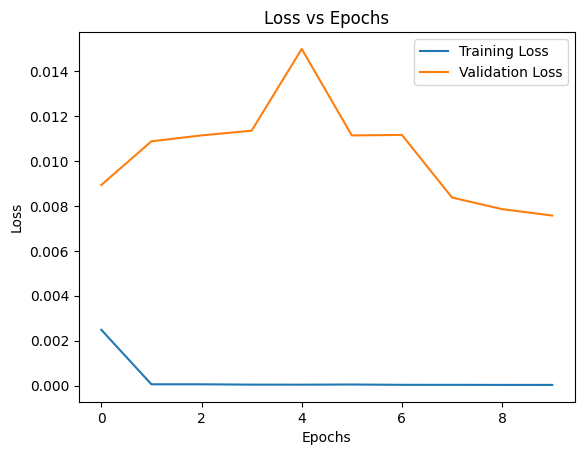

In [76]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


30/30 [==============================] - 0s 1ms/step


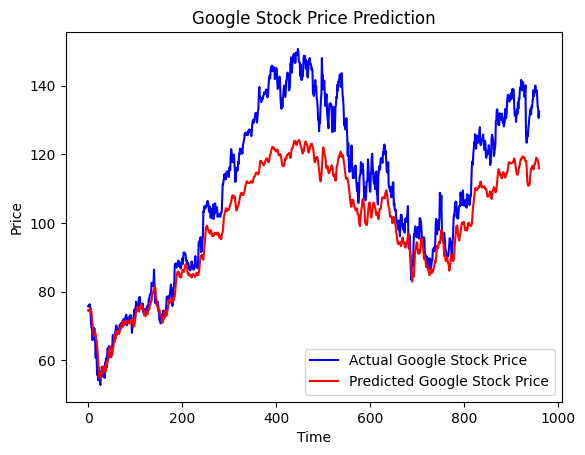

In [77]:
predicted_prices = model.predict(X_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_actual, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()